# Домашнее задание
* Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
* Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее
    * Методом nesterov momentum
    * Методом rmsprop

# Литература
* https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0
* https://habr.com/post/413853/
* https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

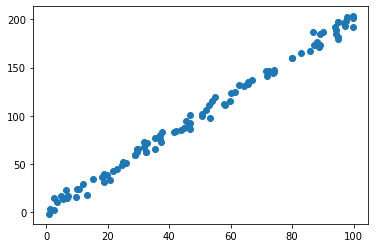

In [6]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

In [12]:
# пример с занятия
EPOCHS = 20
LEARNING_RATE = 0.0001

In [8]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [9]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

In [10]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

In [11]:
theta0 = 1
theta1 = 1
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.005001790549822 t1: 1.3430281567928044 cost: 746.4900055239954
t0: 1.0082899362499054 t1: 1.5679809491368308 cost: 327.45563032688574
t0: 1.0104542981952682 t1: 1.7155016234555882 cost: 147.24792891280356
t0: 1.0118816987695958 t1: 1.8122434335316726 cost: 69.74875864290479
t0: 1.012825810503226 t1: 1.8756851981040457 cost: 36.419873888947734
t0: 1.013452988176448 t1: 1.9172892739641687 cost: 22.086627577438747
t0: 1.0138723248506536 t1: 1.9445725090854054 cost: 15.922544666748161
t0: 1.0141553621793105 t1: 1.96246434376373 cost: 13.271648789666104
t0: 1.0143490161451207 t1: 1.97419743372368 cost: 12.131615473207539
t0: 1.0144840535716946 t1: 1.981891707883336 cost: 11.641335686976563
t0: 1.0145806508974364 t1: 1.9869373849980083 cost: 11.430485453898575
t0: 1.0146520395391445 t1: 1.9902461504412639 cost: 11.339805210834129
t0: 1.014706896468791 t1: 1.9924158743088711 cost: 11.300804635736734
t0: 1.014750911919235 t1: 1.9938386311714857 cost: 11.28402914439451
t0: 1.0147878174629

Метод nesterov momentum

In [ ]:
epochs = 20
gamma = 0.8
theta0_nest, theta1_nest = 1, 1
LEARNING_RATE = 0.0007
moving_average = (1-gamma) * LEARNING_RATE
x0, x1 = 0, 0

In [28]:
for _ in range(epochs):
    
    x0_temp = gamma*x0
    x1_temp = gamma*x1
   
    x0 = x0_temp + moving_average*der_theta0(X, Y, theta0_nest - x0_temp, theta1_nest - x1_temp)
    x1 = x1_temp + moving_average*der_theta1(X, Y, theta0_nest - x0_temp, theta1_nest - x1_temp)

    theta0_nest -= x0
    theta1_nest -= x1
        
    print('t0: {}, t1: {}, cost: {}'.format(theta0_nest, theta1_nest, cost_function(X, Y, theta0_nest, theta1_nest)))    

t0: 1.0070025067697508, t1: 1.480239419509926, cost: 470.17304890467045
t0: 1.0135612799254243, t1: 1.9281004888525044, cost: 19.337703408012526
t0: 1.0168139265173706, t1: 2.1467164760443604, cost: 50.088616341680535
t0: 1.017175334250963, t1: 2.1649632339774834, cost: 60.09605383050952
t0: 1.0162172072657225, t1: 2.091367104412757, cost: 26.747834501675733
t0: 1.0152320293645105, t1: 2.0151690992219407, cost: 11.86827468077133
t0: 1.0147726705027882, t1: 1.9746116013445456, cost: 12.099480203411076
t0: 1.0148181898072113, t1: 1.9683700902551948, cost: 12.637649010602065
t0: 1.015119242579714, t1: 1.9793586588346355, cost: 11.77949208965989
t0: 1.0154514447493481, t1: 1.9921923335341563, cost: 11.303735310879363
t0: 1.015708464700264, t1: 1.9996051718477417, cost: 11.28737428499994
t0: 1.0158838031901143, t1: 2.001197870048025, cost: 11.30856411596456
t0: 1.0160152000524663, t1: 1.9996096360950897, cost: 11.28739702285652
t0: 1.0161403273261704, t1: 1.9974672479556475, cost: 11.272573

Метод rmsprop

In [36]:
theta0_rms, theta1_rms = 1, 1

LEARNING_RATE = 0.6
epochs = 20

g0, g1 = 0, 0
e = 0.00000001
beta = 0.9

In [37]:
for _ in range(epochs):
    
    dt0 = der_theta0(X, Y, theta0_rms, theta1_rms)
    dt1 = der_theta1(X, Y, theta0_rms, theta1_rms)
    
    g0 += beta*g0 +  (1-beta)*dt0**2
    g1 += beta*g1 +  (1-beta)*dt1**2
    
    theta0_rms -= LEARNING_RATE * dt0 / np.sqrt(g0 + e)
    theta1_rms -= LEARNING_RATE * dt1 / np.sqrt(g1 + e)
    
    print('t0: {}, t1: {}, cost: {}'.format(theta0_rms, theta1_rms, cost_function(X, Y, theta0_rms, theta1_rms)))   

t0: 2.8973665960631076, t1: 2.89736659610102, cost: 1493.6065711248195
t0: 1.8342829754581416, t1: 1.8352711069906749, cost: 49.5716258709673
t0: 1.9575314883530284, t1: 1.9590243362256146, cost: 12.151652019970538
t0: 1.9714778894107536, t1: 1.9733537858516423, cost: 11.32299139613858
t0: 1.9752591730363878, t1: 1.9774136258366315, cost: 11.220381233906926
t0: 1.9767010567592571, t1: 1.9790574417133069, cost: 11.195420809770958
t0: 1.9773652551125835, t1: 1.9798679812797624, cost: 11.186629101052523
t0: 1.9777106732138519, t1: 1.9803194686336847, cost: 11.182737883804423
t0: 1.9779061879677386, t1: 1.980591878544932, cost: 11.180737855515947
t0: 1.9780239428724913, t1: 1.9807653886265026, cost: 11.179600272911369
t0: 1.9780982497935502, t1: 1.980880128211483, cost: 11.178906233926124
t0: 1.9781468254891281, t1: 1.9809580280916688, cost: 11.178461433821829
t0: 1.978179440892419, t1: 1.9810119128443606, cost: 11.178166244699682
t0: 1.9782017857233118, t1: 1.9810496856202449, cost: 11.17

True